# Procesamiento de Lenguaje Natural - **Análisis Sintáctico**

Esta notebook presenta ejemplos de los diferentes aspectos relacionados con el análisis sintáctico vistos en clase.

En caso de que los ejemplos lo requieran, los ejecutaremos tomando como base el comienzo de "Harry Potter y la Piedra Filosofal".

In [ ]:
text = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. \
        Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere."

text_list = ["Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.",
                    "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
                    "Mr. Dursley was the director of a firm called Grunnings, which made drills."
                    "He was a big, beefy man with hardly any neck, although he did have a very large mustache."
                    "Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.",
                    "The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere."]

text_short = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much"

* La sintaxis y la estructura de las oraciones generalmente están relacionadas, y existe un conjunto de reglas, convenciones y principios específicos que rigen la forma en que se combinan las palabras.

* El conocimiento sobre la estructura y la sintaxis del lenguaje es útil en diversas áreas:
Procesamiento de texto, la anotación y el análisis para otras operaciones, como la clasificación o el resumen de texto.

* Se realiza luego del pre-procesamiento de texto.


A diferencia del análisis léxico tiene en cuenta:

**Orden de las palabras y significado.**
* Intenta determiner cómo son las dependencias entre las palabras.
* Si se altera el orden de las palabras, puede dificultarse la comprensión de la oración.

**Qué pasa con las stopwords?**
* Si bien son comunmente eliminadas, para análisis sintáctico son implirantes.
* Eliminarlas puede alterar el significado de una oración. Por ejemplo: “no”.

**Los POS.**
  * Identificar adecuadamente los POS es importante.
    * “cuts and bruises” (noun)
    * “an apple is cut” (verb)


### Etiquetado de Part-of-Speech

* Las part-of-speech (partes del habla o discurso) son categorías léxicas específicas a las que se asignan palabras en función de su contexto sintáctico y su función.
* Con el contexto intentamos evitar la ambigüedad. 

* Son útiles cuando necesitamos usar el mismo texto anotado más tarde en aplicaciones más complejas porque podemos filtrar por tags específicos y usar esa información para realizar análisis específicos.
  * Por ejemplo:
    * Podemos reducir los sustantivos y determinar cuáles son los más destacados.
    * Podemos guardar solo los adjetivos para hacer un análisis de sentimientos rápido.

* La mayoría de los taggers se basan en la notación Penn Treebank.

* Dos categorías de palabras:
  * Cerradas. Tienen una categoría relativamente fija. Son palabras con “funciones claras” que tienen a ser cortas, aparecer frecuentemente y, generalmente, dan estructura al resto.
    * Por ejemplo, preposiciones.
  * Abiertas. Los conjuntos se modifican periódicamente.
    * Por ejemplo, sustantivos y verbos.



#### NLTK

In [ ]:
import nltk

In [ ]:
nltk.download('punkt') # necesita el tokenizer
nltk.download('averaged_perceptron_tagger') # la primera vez tenemos que bajar el recurso...

In [ ]:
import pandas as pd

In [ ]:
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T # solo para que se vea más "bonito"


En la notebook de pre-procesamiento vimos que para poder hacer lematización con NLTK necesitábamos darle la etiqueta POS para que pudiede identificar correctamente cuál es la raíz de la palabra.  

Ahora que podemos obtener los POS de las palabras, podemos construir una función para obtener los lemmas utilizando ```NLTK```.

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.corpus import wordnet

def wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_text(text):
    wnl = WordNetLemmatizer()
    lemmatized = ''
    for word in nltk.word_tokenize(text):
      pos = wordnet_pos(nltk.pos_tag([word])[0][1])
      if pos != '':  
        lemmatized = lemmatized + ' ' + wnl.lemmatize(word,pos)
      else:
        lemmatized = lemmatized + ' ' + word
    return lemmatized


In [ ]:
lemmatize_text("My car is broken.")

#### spaCy

El etiquetado POS está incluido en el pipeline por defecto. 

In [ ]:
pip install spacy

In [ ]:
import spacy

In [ ]:
spacy.cli.download('en_core_web_sm') # en caso de que lo necesitemos

In [ ]:
nlp = spacy.load("en_core_web_sm") 

In [ ]:
doc = nlp(text) 
for token in doc:
  print(token.text, token.pos_) 

#### Stanza

El POS tagging es uno de los componentes por defecto del pipeline.

In [ ]:
pip install stanza

In [ ]:
import stanza
stanza.download('en') # hay que descargar los modelos para el lenguaje que querramos analizar

In [ ]:
nlp_stanza = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')

text_short_stanza_doc = nlp_stanza('Barack Obama was born in Hawaii.')

print(*[f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}\tfeats: {word.feats if word.feats else "_"}' for sent in text_short_stanza_doc.sentences for word in sent.words], sep='\n')

### Shallow Parsing

* El shallow parsing es una técnica de análisis de la estructura de una oración que agrupa los tokens en frases de un nivel superior de abstracción.

* El objetivo principal del análisis superficial es obtener frases semánticamente significativas y observar las relaciones entre ellas.

* No profundiza en los detalles de la sintaxis interna ni todas las relaciones dentro de cada fragmento, como si hacen otros tipos de parsing.


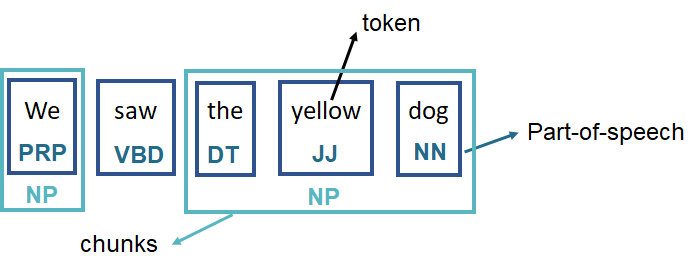

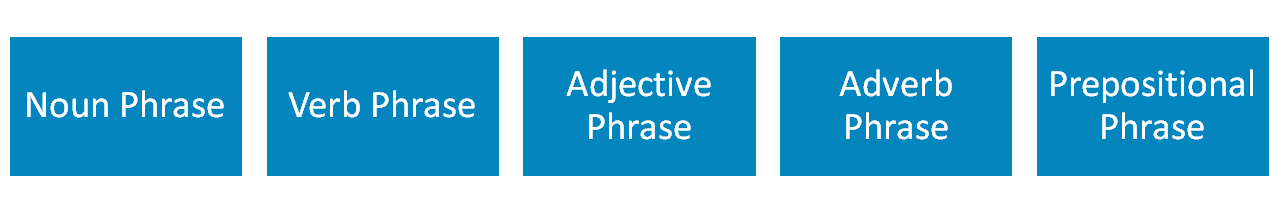

#### NLTK

Lo primero que podemos hacer es crear un conjunto de reglas que reconozca los chunks a partir de los POS que los componen:

In [ ]:
grammar = '''
NP: {<DT>?<JJ>?<NN.*>}
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}
VP: {<MD>?<VB.*>+}
'''

In [ ]:
tokens = nltk.word_tokenize(text_short)
tagged = nltk.pos_tag(tokens)

rp = nltk.RegexpParser(grammar)

shallow_parsed_sent = rp.parse(tagged)
print(shallow_parsed_sent)

Ahora, probemos los chunkers que ya vienen en NLTK.

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [ ]:
from nltk.chunk import ne_chunk

tokens = nltk.word_tokenize(text_short)
tagged = nltk.pos_tag(tokens)

entities = ne_chunk(tagged) # además de detectar los chunks, incluye también entidades
print(entities)

#### spaCy

Este parser también está incluido en el pipeline por defecto. La particularidad que tiene es que solo detecta noun phrases. Para el resto, es necesario instalar extensiones o implementar reglas.

In [ ]:
hp_short_doc = nlp(text_short)

chunk_text = [chunk.text for chunk in hp_short_doc.noun_chunks]
chunk_root = [chunk.root.text for chunk in hp_short_doc.noun_chunks]
chunk_root_dep = [chunk.root.dep_ for chunk in hp_short_doc.noun_chunks]
chunk_root_head = [chunk.root.head.text for chunk in hp_short_doc.noun_chunks]

pd.DataFrame(zip(chunk_text,chunk_root,chunk_root_dep,chunk_root_head),columns=["chunk_text","chunk_root","chunk_root_dep","chunk_root_head"]) # solo para que se vea más ordenado

Vamos a utilizar otra biblioteca que interactúa con spaCy para extraer los verb phrases. 

Al tener que definir la expresión regular que describe a los verb phrases, es lo mismo que utilizar la primera alternativa de NLTK. Si lo necesitamos, lo ideal sería encapsularlo en un mini componente para incorporar al pipeline de spaCy, incluso, utilizando NLTK.

In [ ]:
pip install textacy

*Nota*. Cuando finalice la instalación anterior, reiniciar runtime y volver a ejecutar la celda del principio con los textos de ejemplo.

In [ ]:
import spacy # necesitamos ejecutarlo nuevamente
spacy.cli.download('en_core_web_sm')

In [ ]:
import textacy

pattern = r'(<VERB>?<ADV>*<VERB>+)'
verb_pattern = [{"POS": "VERB", "OP": "?"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"}] # es lo mismo que escribir una expresión regular: <VERB>?<ADV>*<VERB>+

about_talk_doc = textacy.make_spacy_doc(text_short, lang='en_core_web_sm')

verb_phrases = textacy.extract.matches.token_matches(about_talk_doc, verb_pattern)

list(verb_phrases)

## Gramáticas & Parsers

* La gramática ayuda a definir la sintaxis y la estructura en el lenguaje.

* Principalmente consiste en un conjunto de reglas que se utilizan para determinar cómo posicionar palabras, frases y cláusulas al construir oraciones en un lenguaje natural.

* La gramática se puede subdividir en dos clases principales en función de sus representaciones de sintaxis y estructura lingüísticas.

* “Parsing” se refiere a la tarea de crear un árbol de parsing para una oración determinada.
Resalta la estructura sintáctica de acuerdo a la gramática subyacente.

* Los árboles de parsing sirven como una importante etapa intermedia de representación para el análisis semántico. Importante para:
  * Responder preguntas.
  * Extracción de información.

* Problema: Ambigüedad.
  * Oraciones gramáticamente correctas pueden dar lugar a parsings sin sentido semántico.
  * Los parsers deben poder elegir cuál es el parsing correcto de todos los posibles.
  * Requiere conocimiento del contexto.



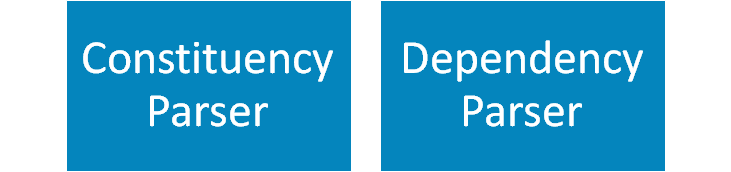

### Constituency parsing

* Analiza la sintaxis y las reglas que rigen la jerarquía y el orden de los diversos componentes en las oraciones.

* Se basa en la identificación de grupos de palabras que se comportan como un conjunto, los constituyentes.

* Cada palabra generalmente pertenece a una categoría léxica específica en el caso y forma la palabra principal de diferentes frases.

* Estas frases se forman en base a reglas llamadas reglas de estructura de frases.

* Se basa en las gramáticas libres del contexto.

* Un árbol de constituency parsing siempre tiene las palabras de la oración como los nodos terminales.

* Cada palabra tiene un nodo padre que contiene su etiqueta POS.
En algunas representaciones gráficas puede omitirse.

* El resto de los nodos no terminales los representan las estructuras de frases.

* Por ejemplo, para la frase "I saw a fox":

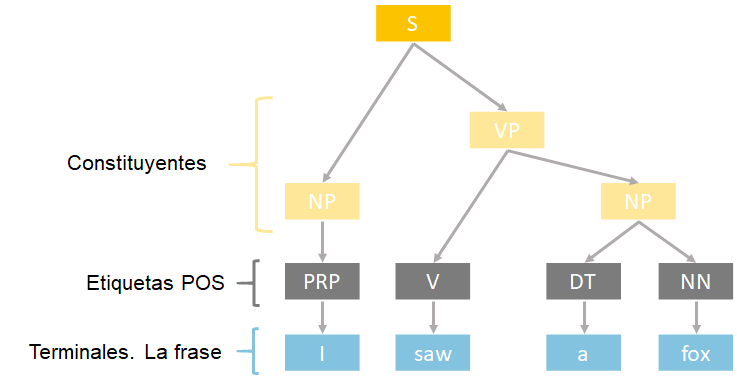


#### NLTK



La primera opción es crear nuestro propio parser definiendo las reglas de la gramática y luego utilizando un parser sobre dicha gramática. En este caso vamos a utiizar un parser basado en programación dinámica (``ChartParser``) en lugar de un parser simplemente recursivo. Este parser de programación dinámica va almacenando resultados intermedios del parsing y los re-usa cuando es apropiado para evitar re explorar caminos, haciendo el parsing más eficiente. 

Acá vamos a crear una gramática considerando la frase de los elefantes y pijamas (y de paso vemos la ambigüedad).

In [ ]:
import nltk # tenemos que volver a importarlo después de haber reiniciado el runtime

In [ ]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas'] # qué pasaría si le damos una palabra que no está en la gramática?
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent): # acá nos va a imprimir todos árboles que puede generar. Si genera más de uno, la gramática es ambigua
    print(tree)

De forma similar, podemos crear una gramática basada en el Penn TreeBank corpus. Hay que tener cuidado con la incorporación de palabras y POS tags, dado que el parsing podría dar error por desconocer palabras. 

Los parsings recursivos descendentes pueden resultar costoso con las idas y vueltas al elegir reglas que no permiten hacer reducciones. En este contexto, NLTK permite el uso de gramáticas probabilísticas, la que asocia a cada regla una probabilidad. Luego, hay parser basados en programación dinámica y cálculos de probabilidades de generación del árbol de parsing para elegir la siguiente regla a utilizar. 

Si queremos utilizar un parser ya creado, NLTK permite utilizar los recursos Java de Stanford NLP, los cuales es necesario descargar. 

(A menos que estemos específicamente utilizando NLTK para todo el resto del procesamiento y no querramos utilizar otra biblioteca, no vale la pena tener que descargar e importar recursos Java.)

In [ ]:
# Descargamos la biblioteca base y la descomprimimos
!echo "Downloading CoreNLP..."
!wget "http://nlp.stanford.edu/software/stanford-corenlp-4.0.0.zip" -O corenlp.zip
!unzip corenlp.zip
!mv ./stanford-corenlp-4.0.0 ./corenlp

In [ ]:
# seteamos variables de entorno
import os
os.environ["CORENLP_HOME"] = "./corenlp"

In [ ]:
from nltk.parse.stanford import StanfordParser

# necesitamos setear los paths a los jars que necesita el parser
scp = StanfordParser(path_to_jar='./corenlp/stanford-corenlp-4.0.0.jar',path_to_models_jar="./corenlp/stanford-corenlp-4.0.0-models.jar")

parse, = scp.raw_parse(text_short)

print(parse)


Otra opción para usar con NLTK es importar un parser creado por [Berkley](https://pypi.org/project/benepar/) basado en deep learning disponible para 11 idiomas (a definir por el modelo importado).

*Nota*. En el último tiempo hubo cambios grandes en la biblioteca con cambio incluso de pasar de usar Tensor Flow a usar PyTorch. Controlar en la instalación qué necesitan.

In [ ]:
pip install benepar

In [ ]:
import benepar

benepar.download('benepar_en3') # descargamos el modelo que nos interesa, controlar el nombre del modelo!

In [ ]:
parser = benepar.Parser("benepar_en3") # la primera vez puede tardar

input_sentence = benepar.InputSentence(
    words=['"', 'Fly', 'safely', '.', '"'],
)

tree = parser.parse(input_sentence) # qué pasa si le ponemos una palabra en otro idioma?

print(tree)

#### spaCy

No lo soporta por defecto, pero podemos utilizar el mismo benepar que para NLTK agregándolo como un elemento más al pipeline.

In [ ]:
import spacy
# from benepar.spacy_plugin import BeneparComponent # para versiones anteriores
from benepar import BeneparComponent, NonConstituentException

In [ ]:
spacy.__version__

In [ ]:
nlp_b = spacy.load('en_core_web_sm')

if spacy.__version__.startswith('2'): # hablamos la clase pasada de diferencias de spacy entre las versiones
        nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
    else:
        nlp.add_pipe("benepar", config={"model": "benepar_en3"})

doc = nlp_b('I shot an elephant in my pajamas')

sent = list(doc.sents)[0]
print(sent._.parse_string)

#### Stanza

No lo soporta en la implementación directa de Python, sino que al igual que para NLTK se debe recurrir a la implementación disponible en Stanford NLP Java, como vimos en una notebook anterior.

In [ ]:
import stanza
stanza.install_corenlp()

In [ ]:
from stanza.server import CoreNLPClient

In [ ]:
client = CoreNLPClient(annotators=['parse'], memory='4G', endpoint='http://localhost:9001') # solo necesitamos el parse
client.start()

La inicialización del proceso puede tardar un poquito. Hasta que el proceso no aparezca, no podemos ejecutar la celda siguiente dado que dará error de conexión (si el proceso no está ejecutando, no hay nada a qué conectarse).

In [ ]:
!ps -o pid,cmd | grep java

In [ ]:
text = 'I shot an elephant in my pajamas'
ann = client.annotate(text)
sentence = ann.sentence[0]

constituency_parse = sentence.parseTree

print(constituency_parse.child[0])

In [ ]:
client.stop()

### Dependency parsing

A diferencia del constituency, no hace uso de las frases constituyentes o de las sub-frases. La sintaxis es expresada en términos de las dependencias directas entre palabras en un grafo. Permiten clasificar los tipos de relaciones o funciones gramaticales, como sujeto, objeto directo, objeto indirecto.

* Gramáticas basadas en la dependencia analizan e infieren tanto la estructura como las dependencias semánticas y las relaciones entre los tokens en una oración.

* En cualquier oración del idioma, todas las palabras, excepto una, tienen alguna relación o dependencia a otras palabras en la oración.
* Relaciones son binarias.
* Proveen una indicación de la semántica de la relación.

* La palabra que no tiene dependencia se llama raíz de la oración.
* El verbo se toma como la raíz de la oración en la mayoría de los casos.
* Todas las otras palabras están directa o indirectamente vinculadas al verbo raíz mediante enlaces, que son las dependencias.


* Un árbol de dependency parsing es un grafo G = (V, E) donde:
  * V: los nodos son las palabras en la oración.
  * E: los arcos conectan dos palabras y tienen asociado un tipo, el cual define la relación gramática entre las palabras.


* El grafo debe satisfacer tres condiciones.
  * Debe haber un único nodo raíz sin arcos entrantes.
  * Cada nodo excepto la raíz debe tener un único arco entrante.
  * Hay un camino único entre la raíz y cada uno de los nodos.

Considerando la misma oración de ejemplo que en el caso anterior (I saw a fox):

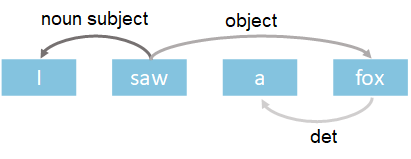

#### NLTK

Al igual que el parser anterior, NLTK requiere los recursos de Stanford NLP. Sin embargo, a diferencia del parser anterior, este requiere que esté ejecutando el server de Stanford NLP.

In [ ]:
# Import client module
from stanza.server import CoreNLPClient

In [ ]:
# definición de anotadores, memoria a asignar y el puerto de conexión
client = CoreNLPClient(annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'], memory='4G', endpoint='http://localhost:9001') # la inicialización puede hacerse de forma directa llamando al java -cp
print(client)

client.start() 

La inicialización del proceso puede tardar un poquito. Hasta que el proceso no aparezca, no podemos ejecutar la celda siguiente dado que dará error de conexión (si el proceso no está ejecutando, no hay nada a qué conectarse).

In [ ]:
!ps -o pid,cmd | grep java

El puerto debe coincidir con el puerto especificado más arriba.

También se podría invocar directamente utilizando el ``jar`` sin necesidad de levantar el server.

*Nota*. Puede fallar la conexión, reintentar.

In [ ]:
from nltk.parse.corenlp import CoreNLPDependencyParser
dep_parser = CoreNLPDependencyParser(url='http://localhost:9001') 

In [ ]:
parse, = dep_parser.raw_parse('The quick brown fox jumps over the lazy dog.')

print(parse.to_conll(4))  

In [ ]:
client.stop() # terminamos la ejecución del proceso java

#### spaCy

Como en casi todo lo que hemos probado, no es necesario hacer nada especial dado que ya viene incluido en el pipeline por defecto. 

In [ ]:
nlp = spacy.load("en_core_web_sm") 
hp_short_doc = nlp(text_short)

for token in hp_short_doc:
    print("{2}({3}-{6}, {0}-{5})".format(token.text, token.tag_, token.dep_, token.head.text, token.head.tag_, token.i+1, token.head.i+1))

Si quisieramos verlo más bonito, con forma de grafo.

In [ ]:
from spacy import displacy

displacy.render(hp_short_doc, jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

### Stanza

Si bien esta biblioteca está asociada a la versión Java de Staford NLP, el dependency parser se encuentra disponible en la versión de Python, con lo que no es necesario invocar a los recursos de Java.

In [ ]:
nlp_stanza = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse') # depparse es el que nos obtendrá las dependencias, todos los componentes anteriores son los que requiere depparse para funcionar

hp_doc_stanza = nlp_stanza(text_short)

print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in hp_doc_stanza.sentences for word in sent.words], sep='\n')

### Constituency parsing vs Dependency parsing

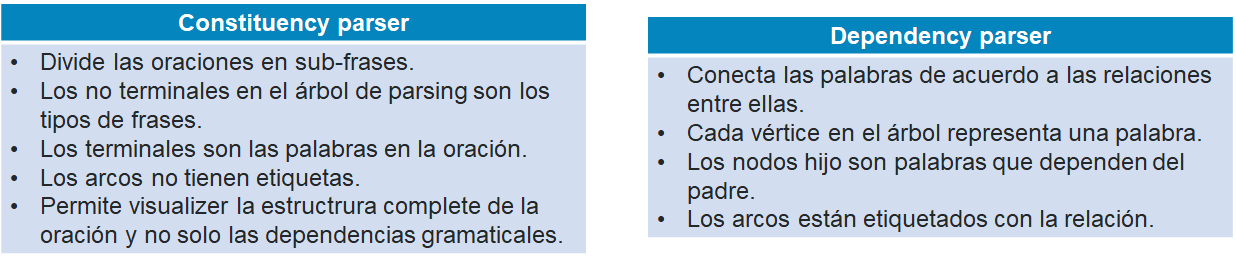

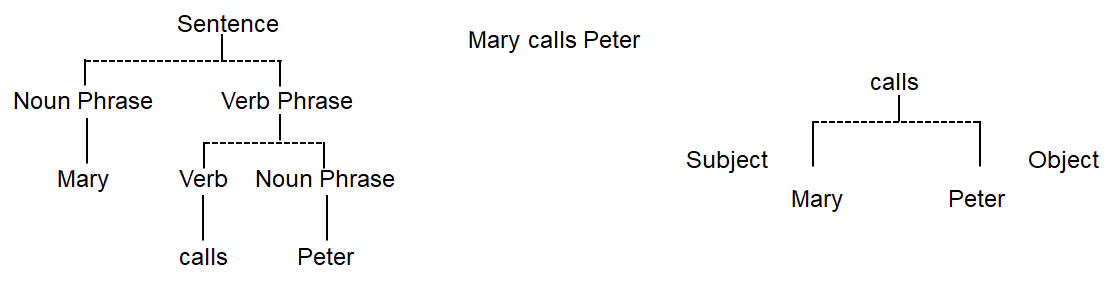

Depende de para qué se vayan a utilizar las estructruras detectadas. Ambos parsers se pueden utilizar para la extracción de características para entrenar modelos supervisados.

* **Dependency parsing.**
  * Útil para tareas como Extracción de Información o Question Answering.
  * Sencillo extraer las triplas sujeto-verbo-objetos que son a menudo indicadoras de las relaciones semánticas entre los predicados.
  * Para lenguajes que no imponen un orden específico a las palabras en una oración.

* **Constituency parsing.**
  * Extraer sub-frases de una oración.
  * No es que no se puedan realizar las tareas que se describen para Dependency, sino que hay que agregar procesamiento al árbol.
  * Chequeo de gramática.
